<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 144.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 161.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 173.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 138.8 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [4]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


<h3>Step 3: Identify High Compensation Outliers</h3>


In [5]:
##Write your code here
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [6]:
##Write your code here
# Drop NaN values in ConvertedCompYearly
comp = df['ConvertedCompYearly'].dropna()

# 1. Calculate basic statistics
mean_comp = comp.mean()
median_comp = comp.median()
std_comp = comp.std()

print(f"Mean: {mean_comp:,.2f}")
print(f"Median: {median_comp:,.2f}")
print(f"Standard Deviation: {std_comp:,.2f}")

# 2. Define threshold for high compensation (mean + 3*std)
high_threshold = mean_comp + 3 * std_comp
print(f"\nThreshold for extremely high compensation: {high_threshold:,.2f}")

# 3. Identify respondents with extremely high compensation
high_earners = df[df['ConvertedCompYearly'] > high_threshold]

# 4. Display summary
print(f"\nNumber of respondents with extremely high compensation: {high_earners.shape[0]}")
print(high_earners[['ResponseId', 'ConvertedCompYearly']].sort_values(by='ConvertedCompYearly', ascending=False).head())

Mean: 86,158.93
Median: 65,000.00
Standard Deviation: 186,753.15

Threshold for extremely high compensation: 646,418.38

Number of respondents with extremely high compensation: 89
       ResponseId  ConvertedCompYearly
15837       15838           16256603.0
12723       12724           13818022.0
28379       28380            9000000.0
17593       17594            6340564.0
17672       17673            4936778.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [7]:
##Write your code here
comp_data = df['ConvertedCompYearly'].dropna()

In [8]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [9]:
# Identify outliers
outliers = comp_data[(comp_data < lower_bound) | (comp_data > upper_bound)]
outlier_count = outliers.count()

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of outliers: {outlier_count}")

Q1: 32712.0
Q3: 108000.0
IQR: 75288.0
Lower Bound: -80220.0
Upper Bound: 220932.0
Number of outliers: 979


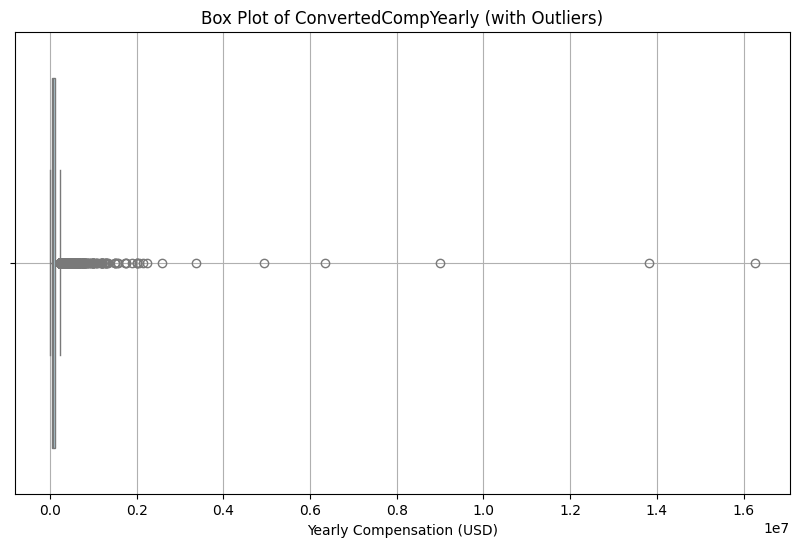

In [10]:
# Boxplot visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x=comp_data, color='lightblue')
plt.title('Box Plot of ConvertedCompYearly (with Outliers)')
plt.xlabel('Yearly Compensation (USD)')
plt.grid(True)
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [11]:
##Write your code here
# Drop rows where ConvertedCompYearly is NaN
df_clean = df.dropna(subset=['ConvertedCompYearly'])

# Calculate IQR
Q1 = df_clean['ConvertedCompYearly'].quantile(0.25)
Q3 = df_clean['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df_clean[
    (df_clean['ConvertedCompYearly'] >= lower_bound) &
    (df_clean['ConvertedCompYearly'] <= upper_bound)
]

# Show sizes before and after
print(f"Original DataFrame (non-NaN 'ConvertedCompYearly'): {df_clean.shape[0]} rows")
print(f"New DataFrame (no outliers): {df_no_outliers.shape[0]} rows")
print(f"Outliers removed: {df_clean.shape[0] - df_no_outliers.shape[0]} rows")

Original DataFrame (non-NaN 'ConvertedCompYearly'): 23437 rows
New DataFrame (no outliers): 22458 rows
Outliers removed: 979 rows


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


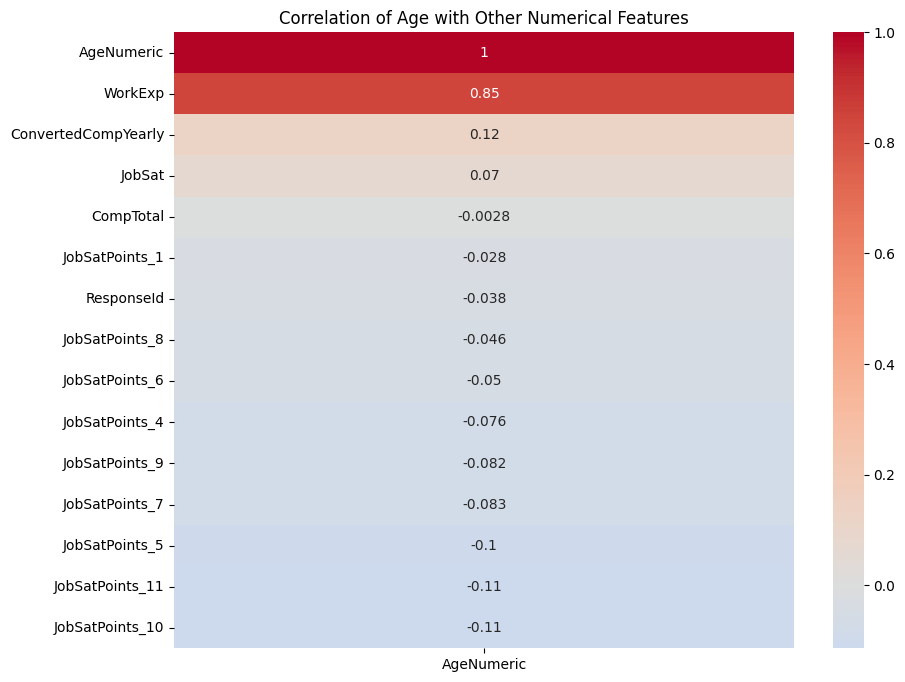

In [12]:
##Write your code here
# 1. Map Age to numeric values (based on approximate midpoints)
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_map)

# 2. Drop rows with missing values in AgeNumeric or ConvertedCompYearly
df_corr = df.dropna(subset=['AgeNumeric'])

# 3. Select numeric columns (e.g., Age, Compensation, etc.)
numeric_cols = df_corr.select_dtypes(include='number')

# 4. Compute correlation matrix
corr_matrix = numeric_cols.corr()

# 5. Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['AgeNumeric']].sort_values(by='AgeNumeric', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Age with Other Numerical Features')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
